In [41]:
import pandas as pd #Manipulación de datos
import numpy as np #Calculos de Matrices y Vectores
import matplotlib.pyplot as pt #Creación de Gráficos
import requests as rq #Manejo y Capturacion de datos Html
import os #Manejo de Archivos Drive

In [42]:
pd.set_option("display.precision",2)

In [43]:
import sys

if 'google.colab' in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')
  dir = '/content/drive/MyDrive/ESIS_2024/7mo_semestre/Analitica_Datos/UNID02/TrabajoUnidad02/Data/bank'
else:
  dir = './Data/bank/'
  
os.listdir(dir)

['bank-full.csv',
 'bank-names.txt',
 'bank.csv',
 'bank-full-trad.xlsx',
 'bank-full.xlsx',
 'bank-full-trad-num.xlsx']

In [44]:
archivo = f'{dir}bank-full-trad.xlsx'
archivonum = f'{dir}bank-full-trad-num.xlsx'
data = pd.read_excel(archivo, sheet_name='bank-full')
data_num = pd.read_excel(archivonum, sheet_name='bank-full')

In [45]:
data.describe()

,edad,balance,dia,duracion_seg,campania,pdias,anterior
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [46]:
df = pd.DataFrame()
columnas_numericas = ['edad','balance','dia','duracion_seg','campania','pdias','anterior','y']
df = data_num[columnas_numericas]
df

,edad,balance,dia,duracion_seg,campania,pdias,anterior,y
0,58,2143,5,261,1,-1,0,0
1,44,29,5,151,1,-1,0,0
2,33,2,5,76,1,-1,0,0
3,47,1506,5,92,1,-1,0,0
4,33,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,1
45207,71,1729,17,456,2,-1,0,1
45208,72,5715,17,1127,5,184,3,1
45209,57,668,17,508,4,-1,0,0


De las variables númericas, descubrimos con corr() que `pdias` es la variable numerica que mayor influencia tiene sobre la variable dependiente `y`

In [47]:
df.corr().round(2)

,edad,balance,dia,duracion_seg,campania,pdias,anterior,y
edad,1.00,0.10,-0.01,-0.00,0.00,-0.02,0.00,0.03
balance,0.10,1.00,0.00,0.02,-0.01,0.00,0.02,0.05
dia,-0.01,0.00,1.00,-0.03,0.16,-0.09,-0.05,-0.03
duracion_seg,-0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00,0.39
campania,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03,-0.07
pdias,-0.02,0.00,-0.09,-0.00,-0.09,1.00,0.45,0.10
anterior,0.00,0.02,-0.05,0.00,-0.03,0.45,1.00,0.09
y,0.03,0.05,-0.03,0.39,-0.07,0.10,0.09,1.00


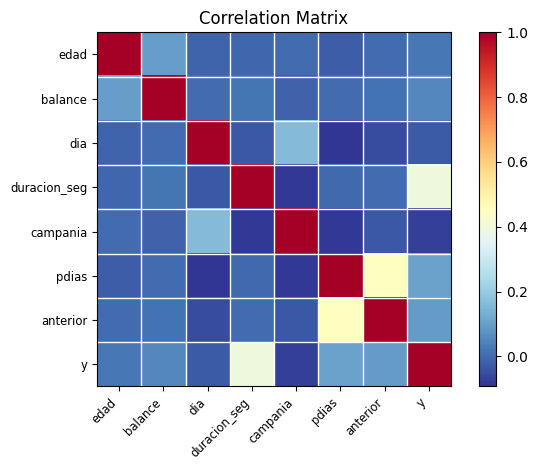

In [48]:
#En este caso vemos baja correlación entre las variables. Dependiendo del
#algoritmo que utilicemos podría ser una buena decisión eliminar features que tuvieran alta correlación
import statsmodels.api as sm

corr = df.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
pt.show()

## Aplicamos regresión lineal para la `duracion_seg`  

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
SEMILLA = 2024

### 1. Preparación de los datos

In [69]:
# Separamos al dataset en X (variables predictoras) e y (variable a predecir)
# X = df[['edad','balance','dia','duracion_seg','campania','pdias','anterior']]
X = df['duracion_seg']
y = df['y']
SEMILLA = 2024 

In [70]:
# Realizamos el split de X e y en los sets de entrenamiento (train) y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEMILLA)

In [71]:
print(f"El dataset de entrenamiento cuenta con {len(X_train)} observaciones")
print(f"El dataset de evaluación cuenta con {len(X_test)} observaciones")

El dataset de entrenamiento cuenta con 36168 observaciones
El dataset de evaluación cuenta con 9043 observaciones


## REGRES LINEAL SIMPLE

In [72]:
X_t=pd.DataFrame(X_train)
# display(X_t)
X_train.shape

(36168,)

In [73]:
X_te=pd.DataFrame(X_test)
display(X_te)
X_te.shape

,duracion_seg
40452,64
18732,747
22738,508
33534,11
4664,129
...,...
6329,191
23611,17
8839,45
27856,132


(9043, 1)

In [74]:
y_t=pd.DataFrame(y_train)
display(y_t)

,y
45184,0
24617,0
2250,0
34742,0
10474,0
...,...
7977,0
2494,0
30244,0
35456,0


In [75]:
y_te=pd.DataFrame(y_test)
display(y_te)

,y
40452,0
18732,0
22738,0
33534,0
4664,0
...,...
6329,0
23611,0
8839,0
27856,0


In [79]:
X_train.describe()

count    36168.00
mean       257.54
std        254.32
min          0.00
25%        103.00
50%        180.00
75%        318.00
max       3785.00
Name: duracion_seg, dtype: float64

In [77]:
from sklearn.linear_model import LinearRegression

In [80]:
regression = LinearRegression()
X_train = X_train.to_frame()
regression.fit(X_train, y_train)

LinearRegression()

In [89]:
X_test = X_test.to_frame()

y_pred = regression.predict(X_test) # La variable de predicción requiere de la coraviable de prueba X_test

x_display=pd.DataFrame(X_test)
display(x_display)

y_display=pd.DataFrame(y_pred)
display(y_display.round(2)) # Salidas predichas

display(y_te) # Salidas reales

,duracion_seg
40452,64
18732,747
22738,508
33534,11
4664,129
...,...
6329,191
23611,17
8839,45
27856,132


,0
0,0.02
1,0.36
2,0.24
3,-0.01
4,0.05
...,...
9038,0.08
9039,-0.00
9040,0.01
9041,0.05


,y
40452,0
18732,0
22738,0
33534,0
4664,0
...,...
6329,0
23611,0
8839,0
27856,0


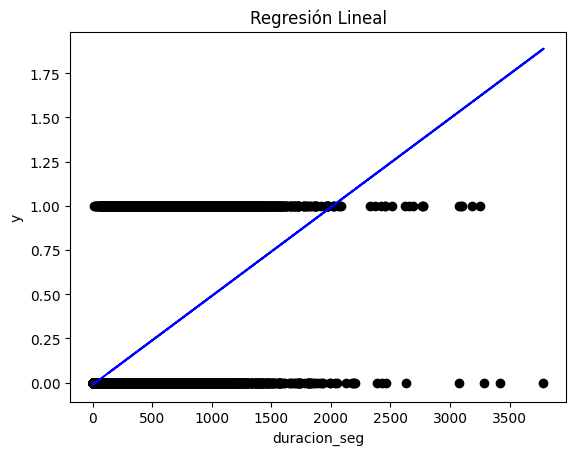

In [90]:
pt.scatter(X_train['duracion_seg'], y_train, color = "black")
pt.plot(X_train['duracion_seg'], regression.predict(X_train), color = "blue")
pt.title("Regresión Lineal")
pt.xlabel("duracion_seg")
pt.ylabel("y")
pt.show()

In [85]:
X_train.describe()

,duracion_seg
count,36168.00
mean,257.54
std,254.32
min,0.00
25%,103.00
50%,180.00
75%,318.00
max,3785.00


### 2. DURACION SEG

In [14]:
# Definimos las variables exogenas (predictores)
variables_exogenas = ['duracion_seg']

In [37]:
# Construimos la matriz de X
X_train_modelo_sup_baños = X_train[variables_exogenas]
X_train_modelo_sup_baños.head()

,duracion_seg
45184,138
24617,291
2250,41
34742,303
10474,103


In [38]:
# Importamos el modelo lineal
from sklearn.linear_model import LinearRegression

In [40]:
# Definimos una instancia del modelo lineal con scikit learn
modelo_lineal_sup_baños = LinearRegression(fit_intercept=True)

## -> fit_intercept se establece en True, el modelo puede ajustarse mejor a los datos al permitir un desplazamiento vertical de la línea de regresión.

In [42]:
# Realizamos el proceso de estimación
modelo_lineal_sup_baños.fit(X_train_modelo_sup_baños, y_train)

LinearRegression()

In [43]:
# Accedemos a los coeficientes estimados
modelo_lineal_sup_baños.coef_

array([0.00050227])

In [44]:
# Accedemos al intercepto
modelo_lineal_sup_baños.intercept_

-0.012455958203143339

In [46]:
# Creamos variables para guardar los coeficientes estimados
coeficientes = modelo_lineal_sup_baños.coef_
intercepto = modelo_lineal_sup_baños.intercept_


TypeError: cannot unpack non-iterable numpy.float64 object